# Fix PDF Python Code

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
import os
from PIL import Image
from fpdf import FPDF
%matplotlib inline

In [8]:
pages = convert_from_path('./input.pdf', 175)

In [26]:
type(pages[1])

PIL.PpmImagePlugin.PpmImageFile

In [27]:
pages[1].size

(1488, 1925)

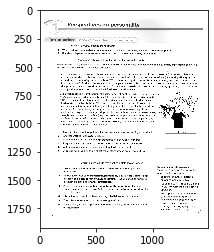

In [11]:
cv2_image = cv2.cvtColor(np.array(pages[1]), cv2.COLOR_RGB2GRAY)
plt.imshow(cv2_image, 'gray')

In [12]:
def show_pic(img):
    fig = plt.figure(figsize=(30,30))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [13]:
print('Max value is',cv2_image.max())
print('Min value is',cv2_image.min())

Max value is 255
Min value is 0


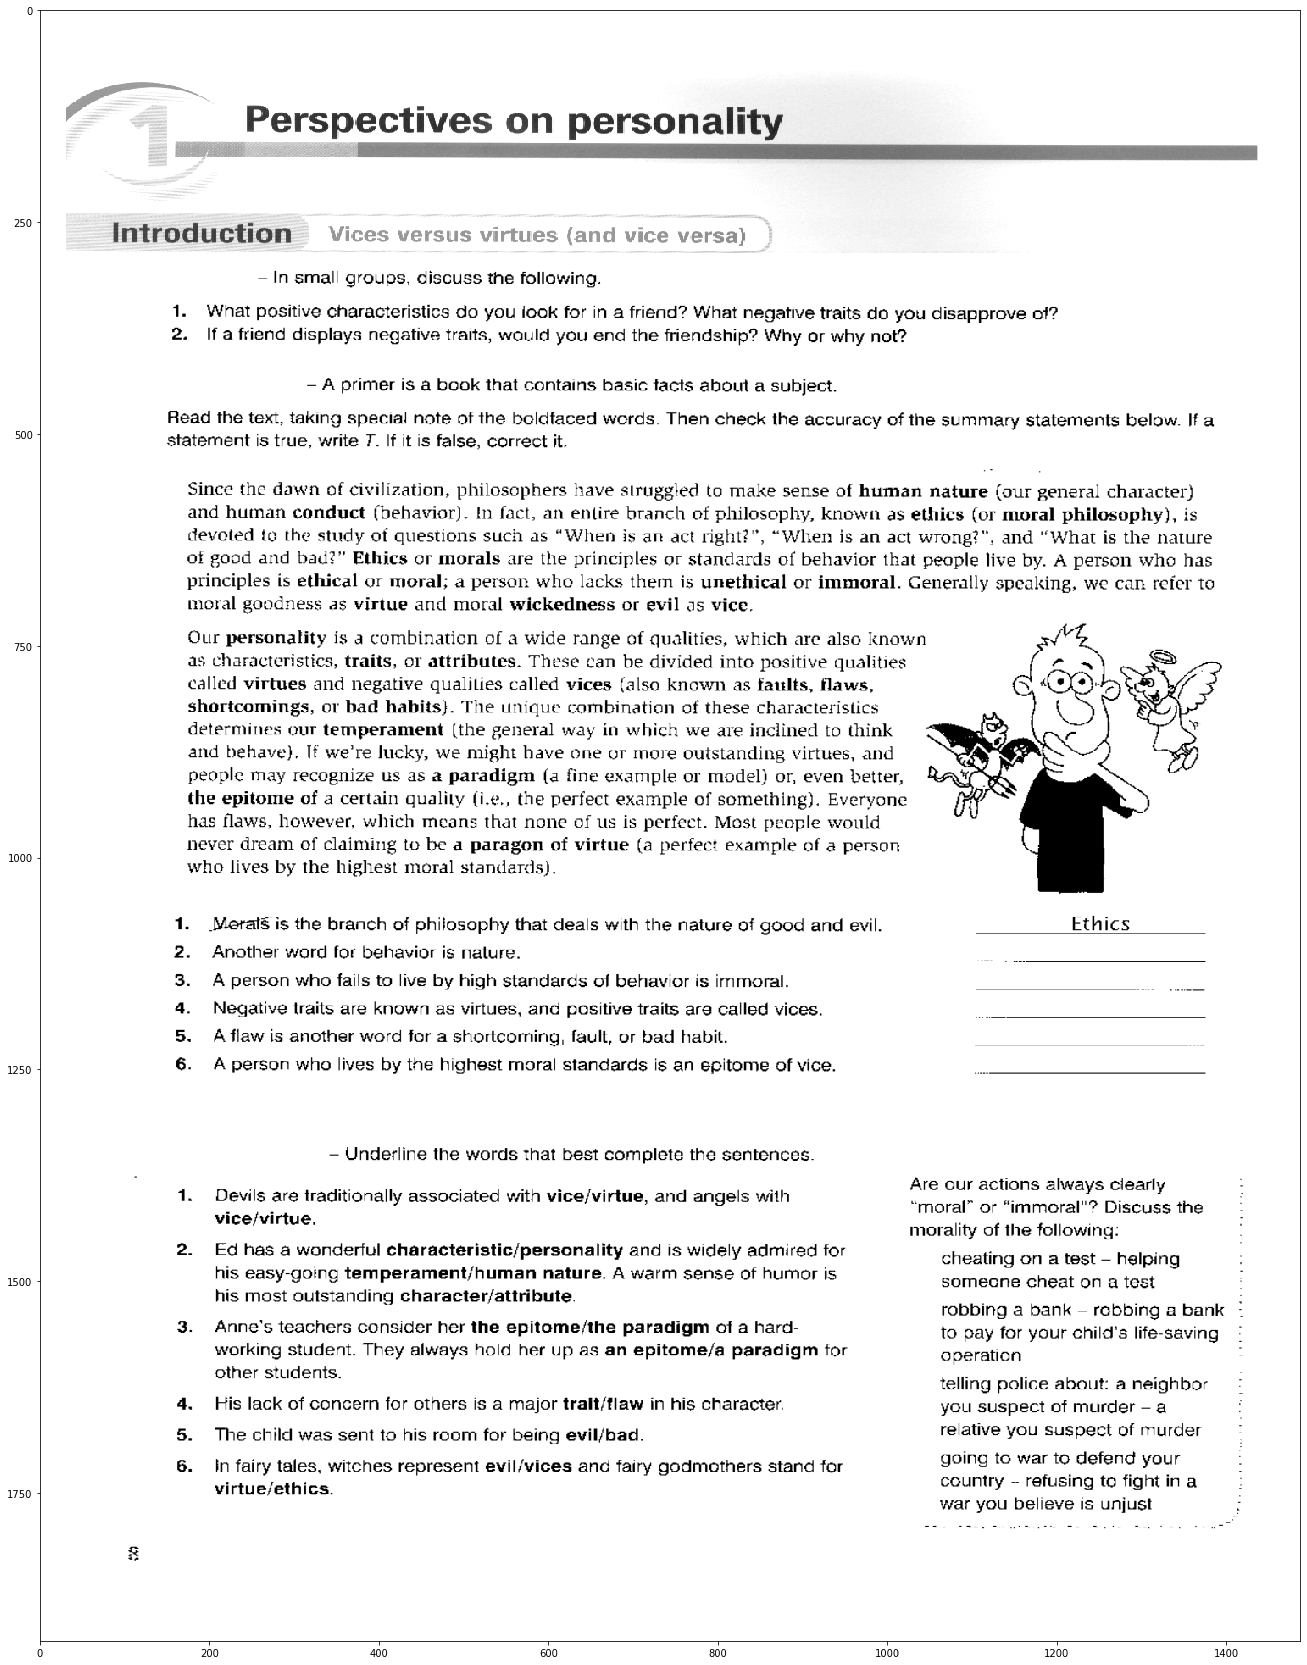

In [14]:
show_pic(pages[1])

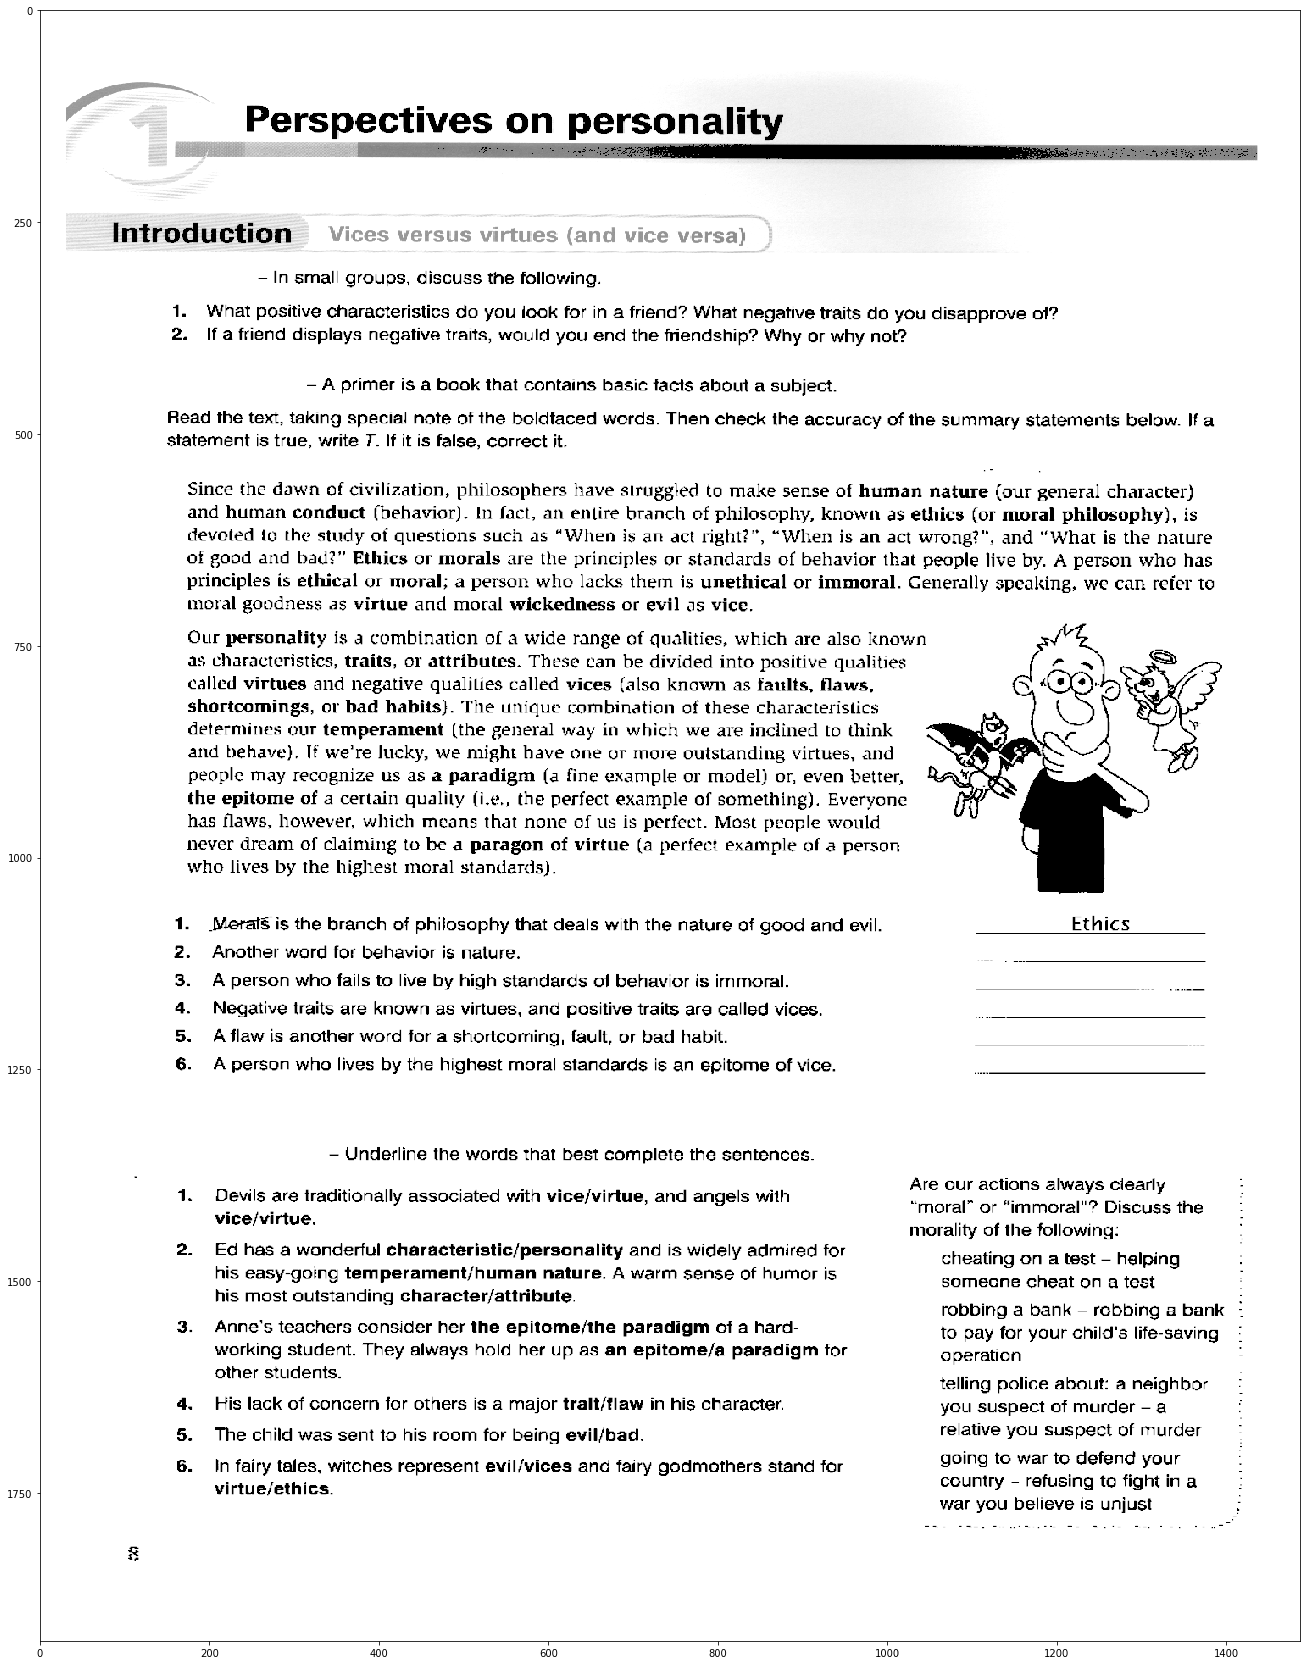

In [15]:
ret,thresh = cv2.threshold(cv2_image,130,255,cv2.THRESH_TOZERO)
show_pic(thresh)

In [16]:
cv2.imwrite('page.jpg', thresh) 

True

In [30]:
print('Open cv2 image gives',thresh.shape)
print('Main image gives',pages[1].size)
print('So its reverse',thresh.shape[1],thresh.shape[0])

Open cv2 image gives (1925, 1488)
Main image gives (1488, 1925)
So its reverse 1488 1925


## Time to make a for loop and save all the pages

In [38]:
print('There are',len(pages),'pages in ths PDF')
path = './Images/'

There are 175 pages in ths PDF


In [13]:
for i in range(0,len(pages)):
    cv2_image = cv2.cvtColor(np.array(pages[i]), cv2.COLOR_RGB2GRAY)
    throttle = (cv2_image.max()-cv2_image.min())/2
    ret,thresh = cv2.threshold(cv2_image,throttle,cv2_image.max(),cv2.THRESH_TOZERO)
    cv2.imwrite(os.path.join(path ,'page'+str(i)+'.jpg'), thresh)

In [33]:
pdf = FPDF()

In [34]:
from os import walk
f = []
for (dirpath, dirnames, filenames) in walk('./Images'):
    f.extend(filenames)
    break

In [40]:
# imagelist is the list with all image filenames
for image in f:
    cover  = Image.open(os.path.join(path,image))
    width, height = cover.size
    
    # convert pixel in mm with 1px=0.264583 mm
    width, height = float(width * 0.264583), float(height * 0.264583)
    
    # given we are working with A4 format size 
    pdf_size = {'P': {'w': 210, 'h': 297}, 'L': {'w': 297, 'h': 210}}
    
    # get page orientation from image size 
    orientation = 'P' if width < height else 'L'
    
    #  make sure image size is not greater than the pdf format size
    width = width if width < pdf_size[orientation]['w'] else pdf_size[orientation]['w']
    height = height if height < pdf_size[orientation]['h'] else pdf_size[orientation]['h']
    
    pdf.add_page(orientation=orientation)
    pdf.image(os.path.join(path,image), 0, 0, width, height)

pdf.output("Fixed.pdf", "F")

''

# Good Work